In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

# Q1. Delivery_Time

Question:- Predict delivery time using sorting time 

In [3]:
delivery_df = pd.read_csv("delivery_time.csv")
delivery_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
delivery_df=delivery_df.rename(columns={'Delivery Time': 'del_t','Sorting Time': 'sort_t' })

In [5]:
delivery_df.corr()

,del_t,sort_t
del_t,1.000000,0.825997
sort_t,0.825997,1.000000


<AxesSubplot:xlabel='del_t', ylabel='Density'>

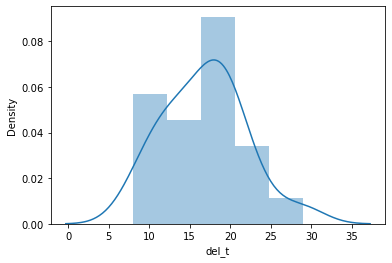

In [6]:
sns.distplot(delivery_df['del_t'])

<AxesSubplot:xlabel='sort_t', ylabel='Density'>

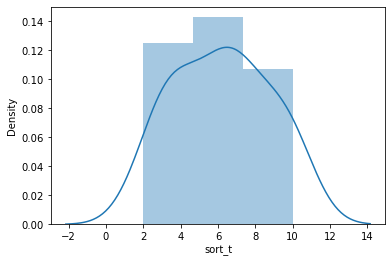

In [7]:
sns.distplot(delivery_df['sort_t'])

In [8]:
model=smf.ols("del_t~sort_t",data=delivery_df).fit()

<AxesSubplot:xlabel='sort_t', ylabel='del_t'>

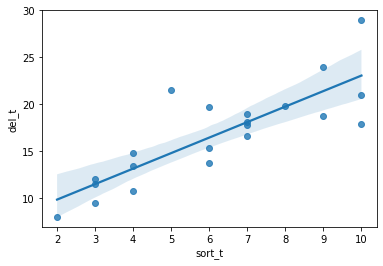

In [27]:
sns.regplot(x="sort_t", y="del_t", data=delivery_df)

In [9]:
model.params

Intercept    6.582734
sort_t       1.649020
dtype: float64

In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
sort_t       6.387447
dtype: float64 
 Intercept    0.001147
sort_t       0.000004
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [13]:
x_log = np.log(delivery_df['sort_t'])
y_log = np.log(delivery_df['del_t'])
x_sqrt = np.sqrt(delivery_df['sort_t'])
y_sqrt = np.sqrt(delivery_df['del_t'])

In [14]:
delivery_df.head()

,del_t,sort_t
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [16]:
#Rsquared value using log transformation on input variable

model1 = smf.ols("del_t~x_log",data = delivery_df).fit()
print(model1.tvalues, '\n' ,model1.pvalues)
(model1.rsquared,model1.rsquared_adj)

Intercept    0.472460
x_log        6.586789
dtype: float64 
 Intercept    0.641980
x_log        0.000003
dtype: float64


(0.6954434611324223, 0.6794141696130761)

In [17]:
#Rsquared value using log transformation on Target variable

model2 = smf.ols("y_log~sort_t",data = delivery_df).fit()
print(model2.tvalues, '\n' ,model2.pvalues)
(model2.rsquared,model2.rsquared_adj)

Intercept    20.601357
sort_t        6.836088
dtype: float64 
 Intercept    1.857343e-14
sort_t       1.592708e-06
dtype: float64


(0.7109478980584187, 0.6957346295351776)

In [19]:
#Rsquared value using log transformation on both input and target variable

model3 = smf.ols("y_log~x_log",data = delivery_df).fit()
print(model3.tvalues, '\n' ,model3.pvalues)
(model3.rsquared,model3.rsquared_adj)

Intercept    13.085552
x_log         8.024484
dtype: float64 
 Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64


(0.77216134926874, 0.7601698413355158)

In [21]:
#Rsquared value using square root transformation on input variable

model4 = smf.ols("del_t~x_sqrt",data = delivery_df).fit()
print(model4.tvalues, '\n' ,model4.pvalues)
(model4.rsquared,model4.rsquared_adj)

Intercept   -0.840911
x_sqrt       6.592434
dtype: float64 
 Intercept    0.410857
x_sqrt       0.000003
dtype: float64


(0.6958062276308671, 0.6797960290851233)

In [22]:
#Rsquared value using square root transformation on Target variable

model5 = smf.ols("y_sqrt~sort_t",data = delivery_df).fit()
print(model5.tvalues, '\n' ,model5.pvalues)
(model5.rsquared,model5.rsquared_adj)

Intercept    13.527452
sort_t        6.723095
dtype: float64 
 Intercept    3.339366e-11
sort_t       2.001215e-06
dtype: float64


(0.704049871541756, 0.6884735489913221)

In [23]:
#Rsquared value using square root transformation on both Target and input variable

model6 = smf.ols("y_sqrt~x_sqrt",data = delivery_df).fit()
print(model6.tvalues, '\n' ,model6.pvalues)
(model6.rsquared,model6.rsquared_adj)

Intercept    4.628248
x_sqrt       7.152817
dtype: float64 
 Intercept    1.833621e-04
x_sqrt       8.475706e-07
dtype: float64


(0.7292011987544664, 0.7149486302678594)

In [ ]:
#Model3 shows the highest Rsquare value with log transformation on both input & output variable.
#It shows 76% of variations.

In [31]:
newdata=pd.Series([8,12])

In [32]:
data_pred=pd.DataFrame(newdata,columns=['sort_t'])

In [33]:
model.predict(data_pred)

0    19.774893
1    26.370973
dtype: float64

# Q2. Salary_Data

Question:- Build a prediction model for Salary_hike

In [24]:
salary_df = pd.read_csv("Salary_Data.csv")
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [25]:
salary_df=salary_df.rename(columns={'YearsExperience': 'y_exp','Salary': 'sal' })

In [26]:
salary_df.corr()

,y_exp,sal
y_exp,1.000000,0.978242
sal,0.978242,1.000000


<AxesSubplot:xlabel='y_exp', ylabel='Density'>

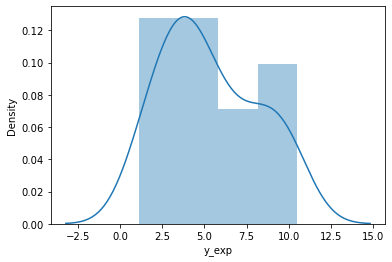

In [27]:
sns.distplot(salary_df['y_exp'])

<AxesSubplot:xlabel='sal', ylabel='Density'>

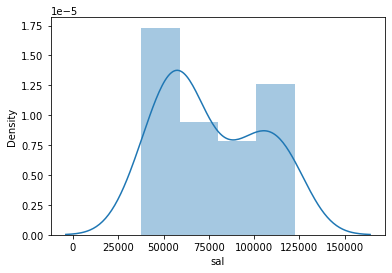

In [28]:
sns.distplot(salary_df['sal'])

In [29]:
model=smf.ols("sal~y_exp",data=salary_df).fit()

<AxesSubplot:xlabel='y_exp', ylabel='sal'>

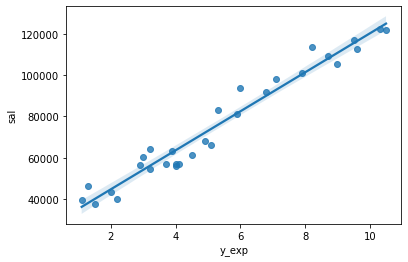

In [30]:
sns.regplot(x="y_exp", y="sal", data=salary_df)

In [31]:
model.params

Intercept    25792.200199
y_exp         9449.962321
dtype: float64

In [42]:
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
y_exp        24.950094
dtype: float64 
 Intercept    5.511950e-12
y_exp        1.143068e-20
dtype: float64


In [43]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [32]:
X_log = np.log(salary_df['y_exp'])
Y_log = np.log(salary_df['sal'])
X_sqrt = np.sqrt(salary_df['y_exp'])
Y_sqrt = np.sqrt(salary_df['sal'])

In [33]:
salary_df['log_years_of_experience'] = X_log
salary_df['log_salary'] = Y_log
salary_df['sqrt_years_of_experience'] = X_sqrt
salary_df['sqrt_salary'] = Y_sqrt

In [34]:
salary_df.head()

,y_exp,sal,log_years_of_experience,log_salary,sqrt_years_of_experience,sqrt_salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314


In [35]:
#Rsquared value using log transformation on input variable

model_log_x = smf.ols("sal~log_years_of_experience",data = salary_df).fit()
print(model_log_x.tvalues, '\n' ,model_log_x.pvalues)
(model_log_x.rsquared,model_log_x.rsquared_adj)

Intercept                   2.895135
log_years_of_experience    12.791989
dtype: float64 
 Intercept                  7.268813e-03
log_years_of_experience    3.250155e-13
dtype: float64


(0.8538888828756969, 0.8486706286926861)

In [37]:
#Rsquared value using log transformation on target variable

model_log_y = smf.ols("log_salary~y_exp",data = salary_df).fit()
print(model_log_y.tvalues, '\n' ,model_log_y.pvalues)
(model_log_y.rsquared,model_log_y.rsquared_adj)

Intercept    273.327166
y_exp         19.584833
dtype: float64 
 Intercept    1.604634e-49
y_exp        7.027439e-18
dtype: float64


(0.9319671194084195, 0.9295373736730059)

In [38]:
#Rsquared value using log transformation on target and input variable

model_log_x_y = smf.ols("log_salary~log_years_of_experience",data = salary_df).fit()
print(model_log_x_y.tvalues, '\n' ,model_log_x_y.pvalues)
(model_log_x_y.rsquared,model_log_x_y.rsquared_adj)

Intercept                  184.867959
log_years_of_experience     16.352542
dtype: float64 
 Intercept                  9.073132e-45
log_years_of_experience    7.395278e-16
dtype: float64


(0.9052150725817149, 0.9018298966024904)

In [39]:
#Rsquared value using square root transformation on input variable

model_sqrt_x = smf.ols("sal~sqrt_years_of_experience",data = salary_df).fit()
print(model_sqrt_x.tvalues, '\n' ,model_sqrt_x.pvalues)
(model_sqrt_x.rsquared,model_sqrt_x.rsquared_adj)

Intercept                   -3.262308
sqrt_years_of_experience    19.437148
dtype: float64 
 Intercept                   2.906965e-03
sqrt_years_of_experience    8.565358e-18
dtype: float64


(0.9310009544993526, 0.9285367028743294)

In [40]:
#Rsquared value using square root transformation on target variable

model_sqrt_y = smf.ols("sqrt_salary~y_exp",data = salary_df).fit()
print(model_sqrt_y.tvalues, '\n' ,model_sqrt_y.pvalues)
(model_sqrt_y.rsquared,model_sqrt_y.rsquared_adj)

Intercept    40.646251
y_exp        23.025247
dtype: float64 
 Intercept    1.920194e-26
y_exp        9.782891e-20
dtype: float64


(0.9498353533865289, 0.9480437588646192)

In [41]:
#Rsquared value using square root transformation on both target and input variable

model_sqrt_x_y = smf.ols("sqrt_salary~sqrt_years_of_experience",data = salary_df).fit()
print(model_sqrt_x_y.tvalues, '\n' ,model_sqrt_x_y.pvalues)
(model_sqrt_x_y.rsquared,model_sqrt_x_y.rsquared_adj)

Intercept                   12.663496
sqrt_years_of_experience    21.315126
dtype: float64 
 Intercept                   4.141645e-13
sqrt_years_of_experience    7.584326e-19
dtype: float64


(0.9419490138976825, 0.9398757643940283)

In [ ]:
#The R square value with square root transformation on target variable is the highest.
#It explains 94% variation

In [44]:
newdata=pd.Series([8,14])

In [45]:
data_pred=pd.DataFrame(newdata,columns=['y_exp'])

In [46]:
model.predict(data_pred)

0    101391.898770
1    158091.672699
dtype: float64